In [1]:
import pandas as pd
df = pd.read_csv(r"D:\Users\Py-MASTER\py-master\DataScience\BangloreHomePrices\model\bengaluru_house_prices.csv")

In [2]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
print(df.shape)

(13320, 9)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB
None


In [5]:
print(df.columns)

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')


In [6]:
df1 = df.drop(['area_type', 'availability', 'society', 'balcony'], axis=1)

In [7]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB
None


In [9]:
print(df1['size'].unique())

['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'
 '1 RK' '1 Bedroom' '8 Bedroom' '2 Bedroom' '7 Bedroom' '5 BHK' '7 BHK'
 '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' nan '9 Bedroom' '27 BHK'
 '10 Bedroom' '11 Bedroom' '10 BHK' '19 BHK' '16 BHK' '43 Bedroom'
 '14 BHK' '8 BHK' '12 Bedroom' '13 BHK' '18 Bedroom']


In [10]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
df2 = df1.dropna(axis=0)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [12]:
print(df2.isnull().sum())

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64


In [13]:
def extract_bedrooms(i):
    try:
        i = str(i)
        l = i.split(" ")
        return int(l[0])
    except:
        return None

In [14]:
df2['bedrooms'] = df2['size'].apply(extract_bedrooms)
df2.head(10)

<ipython-input-14-54356f2f3775>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bedrooms'] = df2['size'].apply(extract_bedrooms)


,location,size,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4
8,Marathahalli,3 BHK,1310,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6


In [15]:
print(df2['bedrooms'].unique())

[ 2  4  3  6  1  8  7  5 11  9 27 10 19 16 43 14 12 13 18]


In [16]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
df2.drop('size',axis=1,inplace=True)

In [18]:
df2.head()

,location,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [19]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
s = "1133 - 1384"
print(s.split("-"))

['1133 ', ' 1384']


In [21]:
s = "1133"
print(s.split('-'))

['1133']


In [22]:
def is_float(i):
    try:
        i = float(i)
        return True
    except:
        return False

In [23]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,price,bedrooms
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [24]:
def extract_Sqft(i):
    if '-' in i:
        l = i.split('-')
        sqft = []
        for item in l:
            sqft.append(float(item))
        return sum(sqft)/2
    else:
        try:
            i = float(i)
            return i
        except:
            index = 0
            for idx in range(len(i)):
                if (i[idx] >='A' and i[idx]<='Z') or (i[idx]>='a' and i[idx] <= 'z'):
                    return float(i[0:idx])

In [25]:
s = "2100 - 2850"
print(s.split("-"))

['2100 ', ' 2850']


In [26]:
print(extract_Sqft("34.46Sq. Meter"))

34.46


In [27]:
print(extract_Sqft("4125Perch"))

4125.0


In [28]:
print(extract_Sqft("2100 - 2850"))

2475.0


In [29]:
df2['total_Area'] = df2['total_sqft'].apply(extract_Sqft)

In [30]:
df2.head(10)

,location,total_sqft,bath,price,bedrooms,total_Area
0,Electronic City Phase II,1056,2.0,39.07,2,1056.0
1,Chikka Tirupathi,2600,5.0,120.00,4,2600.0
2,Uttarahalli,1440,2.0,62.00,3,1440.0
3,Lingadheeranahalli,1521,3.0,95.00,3,1521.0
4,Kothanur,1200,2.0,51.00,2,1200.0
5,Whitefield,1170,2.0,38.00,2,1170.0
6,Old Airport Road,2732,4.0,204.00,4,2732.0
7,Rajaji Nagar,3300,4.0,600.00,4,3300.0
8,Marathahalli,1310,3.0,63.25,3,1310.0
9,Gandhi Bazar,1020,6.0,370.00,6,1020.0


In [31]:
df2['total_Area'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [32]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   total_sqft  13246 non-null  object 
 2   bath        13246 non-null  float64
 3   price       13246 non-null  float64
 4   bedrooms    13246 non-null  int64  
 5   total_Area  13246 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 724.4+ KB
None


In [33]:
df3 = df2.drop('total_sqft',axis=1)

In [34]:
df3.head()

,location,bath,price,bedrooms,total_Area
0,Electronic City Phase II,2.0,39.07,2,1056.0
1,Chikka Tirupathi,5.0,120.00,4,2600.0
2,Uttarahalli,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3.0,95.00,3,1521.0
4,Kothanur,2.0,51.00,2,1200.0


In [35]:
df3['pricepersqft'] =  df3['price']*100000 / df3['total_Area']

In [36]:
df3.head()

,location,bath,price,bedrooms,total_Area,pricepersqft
0,Electronic City Phase II,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2.0,51.00,2,1200.0,4250.000000


In [37]:
df3['location'] = df3['location'].apply(lambda i: i.strip())

In [38]:
df3.head()

,location,bath,price,bedrooms,total_Area,pricepersqft
0,Electronic City Phase II,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2.0,51.00,2,1200.0,4250.000000


In [39]:
df3['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [40]:
len(df3['location'].unique())

1293

In [41]:
df3['location'].value_counts()

Whitefield                           535
Sarjapur  Road                       392
Electronic City                      304
Kanakpura Road                       266
Thanisandra                          236
                                    ... 
Hanuman Nagar                          1
Amco Colony                            1
Chikkanahalli                          1
Beml layout, Rajarajeshwari nagar      1
Achins Road                            1
Name: location, Length: 1293, dtype: int64

In [42]:
df3['location'].value_counts().quantile(0.99)

141.63999999999942

In [43]:
df3['location'].value_counts().quantile(0.999)

366.30400000000736

In [44]:
df3['location'].value_counts().quantile(0.9999)

516.5243999999882

In [45]:
location_stats = df3.groupby('location')

In [46]:
# for location, location_df in location_stats:
#     print(location, location_df)

In [47]:
location_stats['location'].agg('count').sort_values(ascending = False)[0:30]

location
Whitefield                  535
Sarjapur  Road              392
Electronic City             304
Kanakpura Road              266
Thanisandra                 236
Yelahanka                   210
Uttarahalli                 186
Hebbal                      176
Marathahalli                175
Raja Rajeshwari Nagar       171
Bannerghatta Road           152
Hennur Road                 150
7th Phase JP Nagar          149
Haralur Road                141
Electronic City Phase II    131
Rajaji Nagar                106
Chandapura                   98
Bellandur                    96
KR Puram                     88
Hoodi                        88
Electronics City Phase 1     87
Yeshwanthpur                 85
Begur Road                   84
Sarjapur                     81
Kasavanhalli                 79
Harlur                       79
Hormavu                      74
Banashankari                 74
Ramamurthy Nagar             73
Kengeri                      73
Name: location, dtype: int64

In [48]:
location_stats['location'].agg('count').sort_values(ascending = False).max()

535

In [49]:
df3['location'].value_counts()[0:10]

Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
Yelahanka                210
Uttarahalli              186
Hebbal                   176
Marathahalli             175
Raja Rajeshwari Nagar    171
Name: location, dtype: int64

In [50]:
df3['location'].value_counts()['Whitefield']

535

In [51]:
type(df3['location'].value_counts())

pandas.core.series.Series

In [52]:
def countPoints(i):
    return df3['location'].value_counts()[i]

In [53]:
df3['counts'] = df3['location'].apply(countPoints)

In [54]:
df3.head(10)

,location,bath,price,bedrooms,total_Area,pricepersqft,counts
0,Electronic City Phase II,2.0,39.07,2,1056.0,3699.810606,131
1,Chikka Tirupathi,5.0,120.00,4,2600.0,4615.384615,17
2,Uttarahalli,2.0,62.00,3,1440.0,4305.555556,186
3,Lingadheeranahalli,3.0,95.00,3,1521.0,6245.890861,23
4,Kothanur,2.0,51.00,2,1200.0,4250.000000,66
5,Whitefield,2.0,38.00,2,1170.0,3247.863248,535
6,Old Airport Road,4.0,204.00,4,2732.0,7467.057101,33
7,Rajaji Nagar,4.0,600.00,4,3300.0,18181.818182,106
8,Marathahalli,3.0,63.25,3,1310.0,4828.244275,175
9,Gandhi Bazar,6.0,370.00,6,1020.0,36274.509804,2


In [55]:
d = df3[df3['counts']<=10]
locationArr = []
for l in d.location:
    locationArr.append(l)

In [56]:
# print(locationArr)

In [57]:
df3['location'] = df3['location'].apply(lambda x: "other" if x in locationArr else x)

In [58]:
df3.head(10)

,location,bath,price,bedrooms,total_Area,pricepersqft,counts
0,Electronic City Phase II,2.0,39.07,2,1056.0,3699.810606,131
1,Chikka Tirupathi,5.0,120.00,4,2600.0,4615.384615,17
2,Uttarahalli,2.0,62.00,3,1440.0,4305.555556,186
3,Lingadheeranahalli,3.0,95.00,3,1521.0,6245.890861,23
4,Kothanur,2.0,51.00,2,1200.0,4250.000000,66
5,Whitefield,2.0,38.00,2,1170.0,3247.863248,535
6,Old Airport Road,4.0,204.00,4,2732.0,7467.057101,33
7,Rajaji Nagar,4.0,600.00,4,3300.0,18181.818182,106
8,Marathahalli,3.0,63.25,3,1310.0,4828.244275,175
9,other,6.0,370.00,6,1020.0,36274.509804,2


In [59]:
print(df3.shape)

(13246, 7)


In [60]:
print(len(df3['location'].unique()))

242


In [61]:
typical_bedroomsize = 300
df3['areaPerbedroom'] = df3['total_Area']/df3['bedrooms']

In [62]:
df3.head()

,location,bath,price,bedrooms,total_Area,pricepersqft,counts,areaPerbedroom
0,Electronic City Phase II,2.0,39.07,2,1056.0,3699.810606,131,528.0
1,Chikka Tirupathi,5.0,120.00,4,2600.0,4615.384615,17,650.0
2,Uttarahalli,2.0,62.00,3,1440.0,4305.555556,186,480.0
3,Lingadheeranahalli,3.0,95.00,3,1521.0,6245.890861,23,507.0
4,Kothanur,2.0,51.00,2,1200.0,4250.000000,66,600.0


In [63]:
len(df3[df3['areaPerbedroom']<300])

782

In [64]:
df4 = df3[df3['areaPerbedroom']<300]

In [65]:
df4.head()

,location,bath,price,bedrooms,total_Area,pricepersqft,counts,areaPerbedroom
9,other,6.0,370.0,6,1020.0,36274.509804,2,170.000000
45,HSR Layout,9.0,200.0,8,600.0,33333.333333,53,75.000000
58,Murugeshpalya,4.0,150.0,6,1407.0,10660.980810,14,234.500000
68,Devarachikkanahalli,7.0,85.0,8,1350.0,6296.296296,17,168.750000
70,other,3.0,100.0,3,500.0,20000.000000,1,166.666667


In [66]:
len(df4)

782

In [67]:
df5 = df3.drop(df4.index, axis=0)

In [68]:
df5.head()

,location,bath,price,bedrooms,total_Area,pricepersqft,counts,areaPerbedroom
0,Electronic City Phase II,2.0,39.07,2,1056.0,3699.810606,131,528.0
1,Chikka Tirupathi,5.0,120.00,4,2600.0,4615.384615,17,650.0
2,Uttarahalli,2.0,62.00,3,1440.0,4305.555556,186,480.0
3,Lingadheeranahalli,3.0,95.00,3,1521.0,6245.890861,23,507.0
4,Kothanur,2.0,51.00,2,1200.0,4250.000000,66,600.0


In [69]:
df5.shape

(12464, 8)

In [70]:
df5.drop(['counts','areaPerbedroom'],axis=1,inplace=True)

In [71]:
df5.head()

,location,bath,price,bedrooms,total_Area,pricepersqft
0,Electronic City Phase II,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2.0,51.00,2,1200.0,4250.000000


In [72]:
df5['pricepersqft'].quantile(0.99)

21734.59795198925

In [73]:
df5['pricepersqft'].quantile(0.999)

38245.833333336224

In [74]:
max_threshold = df5['pricepersqft'].quantile(0.99)
min_threshold = df5['pricepersqft'].quantile(0.01)
print(max_threshold, min_threshold)

21734.59795198925 2546.672174614764


In [75]:
df6 = df5[((df5['pricepersqft']<=max_threshold) & (df5['pricepersqft']>=min_threshold))]
print(df6.shape)

(12214, 6)


In [76]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (9,5)

In [77]:
def plotScatter(location):
    bhk2 = df6[((df6['location'] == location) & (df6['bedrooms'] == 2))]
    bhk3 = df6[((df6['location'] == location) & (df6['bedrooms'] == 3))]
    plt.scatter(bhk2['total_Area'] , bhk2['price'], marker='+', label='2 BHK')
    plt.scatter(bhk3['total_Area'], bhk3['price'], label= '3 BHK')
    plt.xlabel('Total Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()

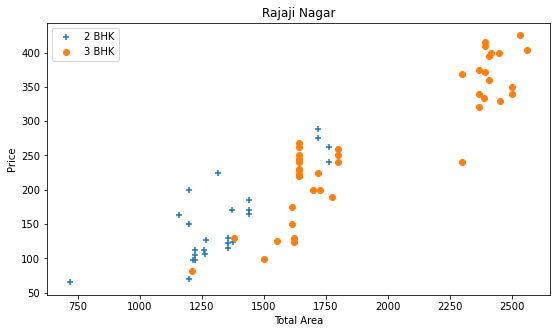

In [78]:
plotScatter('Rajaji Nagar')

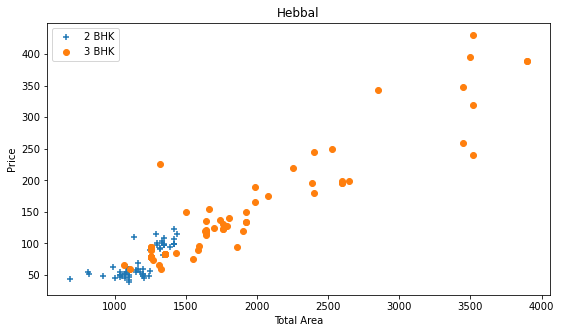

In [79]:
plotScatter('Hebbal')

In [80]:
df6.tail(10)

,location,bath,price,bedrooms,total_Area,pricepersqft
13309,Yeshwanthpur,3.0,92.13,3,1675.0,5500.298507
13310,Rachenahalli,2.0,52.71,2,1050.0,5020.000000
13312,Bellandur,2.0,47.00,2,1262.0,3724.247227
13313,Uttarahalli,2.0,57.00,3,1345.0,4237.918216
13314,Green Glen Layout,3.0,112.00,3,1715.0,6530.612245
13315,Whitefield,4.0,231.00,5,3453.0,6689.834926
13316,other,5.0,400.00,4,3600.0,11111.111111
13317,Raja Rajeshwari Nagar,2.0,60.00,2,1141.0,5258.545136
13318,Padmanabhanagar,4.0,488.00,4,4689.0,10407.336319
13319,Doddathoguru,1.0,17.00,1,550.0,3090.909091


In [81]:
exclude_indices = df6[(df6['bath'])>=(df6['bedrooms']+2)].index

In [82]:
df6.drop(exclude_indices, axis=0,inplace=True)

In [83]:
df6.shape

(12076, 6)

In [84]:
df6.bedrooms.unique()

array([ 2,  4,  3,  1,  8,  6,  5,  7, 11,  9, 16, 10, 13], dtype=int64)

In [85]:
df6.bath.unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  6.,  7.,  9., 16., 10., 13.])

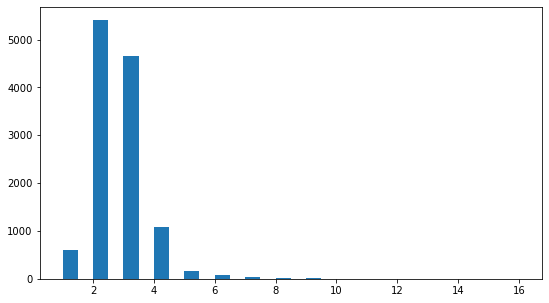

In [86]:
plt.hist(df6['bedrooms'], bins=30)
plt.show()

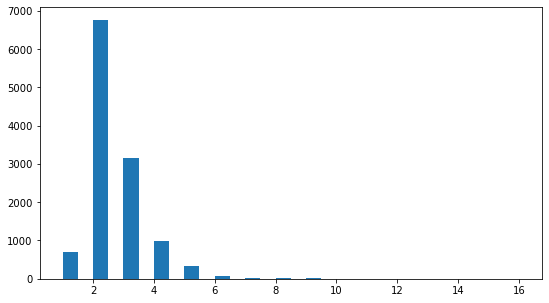

In [87]:
plt.hist(df6['bath'], bins=30)
plt.show()

In [88]:
df6.head()

,location,bath,price,bedrooms,total_Area,pricepersqft
0,Electronic City Phase II,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2.0,51.00,2,1200.0,4250.000000


In [89]:
dummies = pd.get_dummies(df6['location'])

In [90]:
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
dummies.drop('other', axis=1, inplace=True)

In [92]:
merged = pd.concat([df6,dummies], axis=1)

In [93]:
df7 = merged.drop('location', axis=1)

In [94]:
df7.head()

,bath,price,bedrooms,total_Area,pricepersqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2.0,39.07,2,1056.0,3699.810606,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,120.00,4,2600.0,4615.384615,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,62.00,3,1440.0,4305.555556,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,95.00,3,1521.0,6245.890861,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,51.00,2,1200.0,4250.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
print(df7.shape)

(12076, 246)


In [96]:
new_index = [i for i in range(len(df7))]

In [97]:
df7.index = new_index

In [98]:
df7

,bath,price,bedrooms,total_Area,pricepersqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2.0,39.07,2,1056.0,3699.810606,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,120.00,4,2600.0,4615.384615,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,62.00,3,1440.0,4305.555556,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,95.00,3,1521.0,6245.890861,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,51.00,2,1200.0,4250.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12071,4.0,231.00,5,3453.0,6689.834926,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
12072,5.0,400.00,4,3600.0,11111.111111,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12073,2.0,60.00,2,1141.0,5258.545136,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12074,4.0,488.00,4,4689.0,10407.336319,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
def calculate_zScore(i):
    """z = (X-Mu)/stddev"""
    z = (i-(df7['pricepersqft'].mean()))/(df7['pricepersqft'].std())
    return z

In [100]:
df7['z-scores'] = df7['pricepersqft'].apply(calculate_zScore)

In [101]:
df7.tail()

,bath,price,bedrooms,total_Area,pricepersqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,z-scores
12071,4.0,231.0,5,3453.0,6689.834926,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.211556
12072,5.0,400.0,4,3600.0,11111.111111,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.715152
12073,2.0,60.0,2,1141.0,5258.545136,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.275200
12074,4.0,488.0,4,4689.0,10407.336319,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.475811
12075,1.0,17.0,1,550.0,3090.909091,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.012374


In [102]:
df7['pricepersqft'].std()

2940.4678437295647

In [103]:
df7[((df7['z-scores']>=-0.68) & (df7['z-scores']<=0.68))]

,bath,price,bedrooms,total_Area,pricepersqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,z-scores
1,5.0,120.00,4,2600.0,4615.384615,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.493928
2,2.0,62.00,3,1440.0,4305.555556,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.599295
3,3.0,95.00,3,1521.0,6245.890861,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.060578
4,2.0,51.00,2,1200.0,4250.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.618188
6,4.0,204.00,4,2732.0,7467.057101,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.475875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12067,2.0,52.71,2,1050.0,5020.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.356325
12069,2.0,57.00,3,1345.0,4237.918216,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.622297
12070,3.0,112.00,3,1715.0,6530.612245,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.157407
12071,4.0,231.00,5,3453.0,6689.834926,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.211556


In [104]:
df7 = df7[((df7['z-scores']>=-0.68) & (df7['z-scores']<=0.68))]
df7.shape

(7706, 247)

In [105]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [107]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [108]:
score_lr = []
score_rf = []
score_dt = []
score_svm = []
X = df7.drop(['price', 'pricepersqft', 'z-scores'],axis=1)
y = df7['price']
for train_index, test_index in kf.split(X):
#     print(train_index, test_index)
#     print(len(train_index), len(test_index))
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]
#     print(len(X_train), len(y_train), len(X_test), len(y_test))
    score_lr.append(get_score(LinearRegression(), X_train, X_test, y_train, y_test))
    score_rf.append(get_score(RandomForestRegressor(), X_train, X_test, y_train, y_test))
    score_dt.append(get_score(DecisionTreeRegressor(), X_train, X_test, y_train, y_test))
    score_svm.append(get_score(SVR(), X_train, X_test, y_train, y_test))
#     print(X_train, y_train)

In [109]:
print(score_lr)
print(score_rf)
print(score_dt)
print(score_svm)

[-5774362.091435777, 0.9306182584671977, 0.8675853024385616, -196.2575161557568, 0.9305852555422587]
[0.880410404502139, 0.8534260064001202, 0.8540056092001824, 0.879881325047546, 0.9084040302934115]
[0.8284001143277472, 0.9044483517774207, 0.8018478665284944, 0.8281316327074254, 0.8847508320967694]
[0.6434408079778795, 0.39197999793095795, 0.7676857991731033, 0.7838170685229581, 0.4312132829674733]


In [110]:
avg_lr = sum(score_lr)/len(score_lr)
avg_rf = sum(score_rf)/len(score_rf)
avg_dt = sum(score_dt)/len(score_dt)
avg_svm = sum(score_svm)/len(score_svm)

In [111]:
print(f"Linear Regression : {avg_lr}")
print(f"Random forest : {avg_rf}")
print(f"Decision Tree : {avg_dt}")
print(f"SVM : {avg_svm}")

Linear Regression : -1154911.1240326234
Random forest : 0.8752254750886799
Decision Tree : 0.8495157594875714
SVM : 0.6036273913144743


In [112]:
X.columns

Index(['bath', 'bedrooms', 'total_Area', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

# Hyper Params Tuning

In [113]:
model_params = {
    'random_forest': {
        'model': RandomForestRegressor(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    }
}

In [114]:
from sklearn.model_selection import GridSearchCV
scores = []
for i, j in model_params.items():
    gsv = GridSearchCV(j['model'],
                      j['params'],
                      cv = 5, return_train_score = False)
    gsv.fit(X, y)
    scores.append({'model': i, 'bestScore': gsv.best_score_, 'bestParams': gsv.best_params_})

In [115]:
scores

[{'model': 'random_forest',
  'bestScore': 0.8753409740542294,
  'bestParams': {'n_estimators': 10}}]

In [116]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=scores[0]['bestParams']['n_estimators'])

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [118]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

In [119]:
rf.predict(X_test)

array([ 70.24133333,  56.626     , 124.5       , ...,  49.16      ,
        43.39425   ,  58.35721206])

In [120]:
X.columns

Index(['bath', 'bedrooms', 'total_Area', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [121]:
list(X.columns).index('total_Area')

2

In [122]:
import numpy as np
loc_index = np.where(X.columns == "Vittasandra")

In [123]:
loc_index[0][0]

237

In [124]:
def predict_price(location, sqft, bath, bedrooms):
    locationList = list(X.columns)
    import numpy as np
    a = np.zeros(len(X.columns), dtype='i')
    a[0] = bath
    a[1] = bedrooms
    a[2] = sqft
#     a[3] = pricepersqft
    locindex = locationList.index(location)
    if locindex>=0:
        a[locindex] = 1
    return a, str(round(rf.predict([a])[0], 3)) + " " +"Lakhs Rupees Only"

In [125]:
predict_price("Vittasandra", 1000, 4, 4)[1]

'62.825 Lakhs Rupees Only'

In [126]:
predict_price("Whitefield", 1000, 4, 4)[1]

'59.3 Lakhs Rupees Only'

In [127]:
predict_price("1st Phase JP Nagar", 1000,2,3)[1]

'60.825 Lakhs Rupees Only'

In [128]:
predict_price("Indira Nagar",1000,2,2)[1]

'54.545 Lakhs Rupees Only'

In [129]:
predict_price("1st Phase JP Nagar", 1000,2,2)[1]

'54.545 Lakhs Rupees Only'

In [130]:
predict_price("Vijayanagar", 1000,2,2)[1]

'55.876 Lakhs Rupees Only'

In [131]:
y_test

11856     72.00
6928      51.15
6269     125.00
4594     125.00
6000     157.50
          ...  
156       56.00
3079      61.25
4622      45.00
7930      49.00
5509      60.00
Name: price, Length: 1542, dtype: float64

In [132]:
data = [i for i in y_test]
y_true = np.array(data)
y_true

array([ 72.  ,  51.15, 125.  , ...,  45.  ,  49.  ,  60.  ])

In [133]:
y_pred = rf.predict(X_test)
y_pred

array([ 70.24133333,  56.626     , 124.5       , ...,  49.16      ,
        43.39425   ,  58.35721206])

In [134]:
print(len(y_test), len(y_pred))

1542 1542


In [135]:
predict_price("Yelahanka New Town", 1000,2,2)[1]

'54.545 Lakhs Rupees Only'

In [136]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(f"Mean Squared Error : {mean_squared_error(y_true, y_pred)}")
print(f"Mean Absolute Error : {mean_absolute_error(y_true, y_pred)}")
print(f"R2 Score : {r2_score(y_true, y_pred)}")

Mean Squared Error : 329.8110853525162
Mean Absolute Error : 11.594577717012173
R2 Score : 0.8516065644041615


In [137]:
import pickle
file = open("MyModel.sav", 'wb')
pickle.dump(rf, file)

In [138]:
import pickle
file = open("MyModel.sav", 'rb')
model = pickle.load(file)

In [139]:
import numpy as np
data = predict_price("Vittasandra", 1000, 4, 4)[0]
arr = np.array([data], dtype='i')
model.predict(arr)[0]

62.825

In [140]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
X = df7.drop(['price', 'pricepersqft', 'z-scores'],axis=1)
y = df7['price']
cv_l = cross_val_score(LinearRegression(), X, y, cv=5)
print(cv_l)
cv_r = cross_val_score(RandomForestRegressor(), X, y, cv=5)

[-5.77436209e+06  9.30618258e-01  8.67585302e-01 -1.96257516e+02
  9.30585256e-01]


In [141]:
print(cv_r)

[0.88244846 0.85787383 0.85510514 0.88107219 0.91328279]


In [142]:
# import pickle
# f = open('columns.sav', 'wb')
cols = []
for col in X.columns:
    cols.append(col.lower())
# pickle.dump()
# cols

In [143]:
import pickle
f = open('columns.sav', 'wb')
pickle.dump(cols, f)
f.close()

In [144]:
import pickle
f=open('columns.sav','rb')
c = pickle.load(f)
# print(c)
f.close()

In [145]:
import pickle
file = open(r"C:\Users\HP\My Practice Notebooks\columns.sav", 'rb')
col = pickle.load(file)
print(col)

['bath', 'bedrooms', 'total_area', '1st block jayanagar', '1st phase jp nagar', '2nd phase judicial layout', '2nd stage nagarbhavi', '5th block hbr layout', '5th phase jp nagar', '6th phase jp nagar', '7th phase jp nagar', '8th phase jp nagar', '9th phase jp nagar', 'aecs layout', 'abbigere', 'akshaya nagar', 'ambalipura', 'ambedkar nagar', 'amruthahalli', 'anandapura', 'ananth nagar', 'anekal', 'anjanapura', 'ardendale', 'arekere', 'attibele', 'beml layout', 'btm 2nd stage', 'btm layout', 'babusapalaya', 'badavala nagar', 'balagere', 'banashankari', 'banashankari stage ii', 'banashankari stage iii', 'banashankari stage v', 'banashankari stage vi', 'banaswadi', 'banjara layout', 'bannerghatta', 'bannerghatta road', 'basavangudi', 'basaveshwara nagar', 'battarahalli', 'begur', 'begur road', 'bellandur', 'benson town', 'bharathi nagar', 'bhoganhalli', 'billekahalli', 'binny pete', 'bisuvanahalli', 'bommanahalli', 'bommasandra', 'bommasandra industrial area', 'bommenahalli', 'brookefield'